In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [30]:
data = pd.read_csv("KS_train_data.csv", delimiter=',') 
test = pd.read_csv("KS_test_data.csv", delimiter=';')

In [32]:
data['funded'].value_counts()

True     58454
False    41546
Name: funded, dtype: int64

<AxesSubplot:>

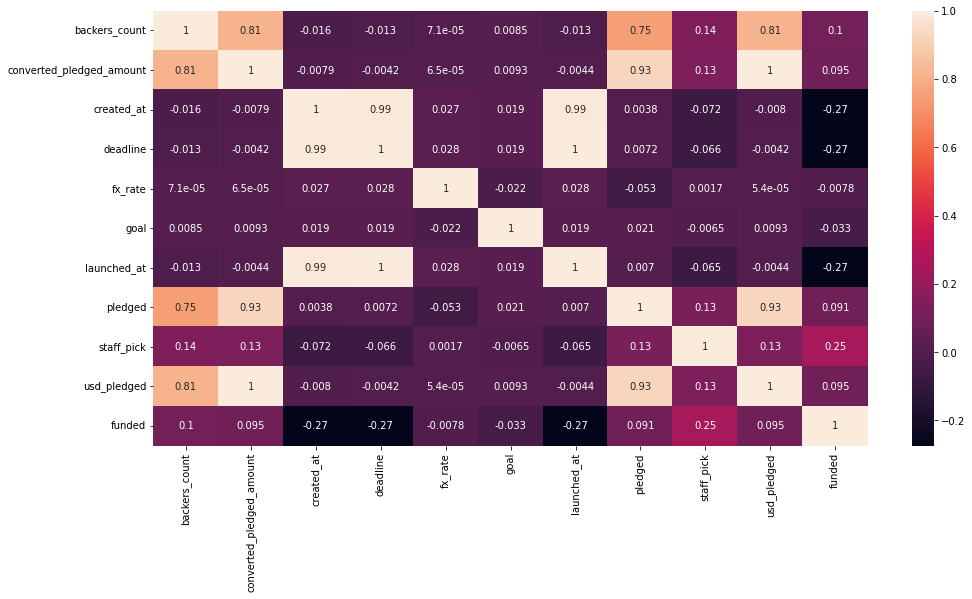

In [34]:
corrmat = data.corr()

sns.heatmap(corrmat, annot=True)

In [59]:
data['Prob_score'] = data['funded']

index = 0
for row in data.category:
    if index == 0:
        category = row
        true_values = len(data[(data.category == row) & (data.funded == True)])
        total_values = len(data[(data.category == row)]) 
    elif row != category:
        category = row
        true_values = len(data[(data.category == row) & (data.funded == True)])
        total_values = len(data[(data.category == row)])
    data['Prob_score'][index] = true_values / total_values
    index += 1

In [63]:
#here 2 possible outliers can be seen at the top
# data.nlargest(15,['converted_pledged_amount'] )
data[data.category == 'music'].head()

,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,goal,launched_at,name,pledged,staff_pick,usd_pledged,location,funded,subcategory,project_url,reward_url,Prob_score
56570,KS_056570,1,Raising funding to have the Matys Quartet trav...,music,50,US,1325814069,USD,1333918800,1.0,15000.0,1330332289,The Matys Quartet performing the String Quarte...,50.0,False,50.0,"Wilmington, NC",False,classical music,https://www.kickstarter.com/projects/185996498...,https://www.kickstarter.com/projects/185996498...,0.680006
56571,KS_056571,1,Three intrumental suites arranged from the ori...,music,20,US,1329925229,USD,1332957579,1.0,3000.0,1330369179,KAFKAMUSIK Suites no.'s 1-3,20.0,False,20.0,"Franklin, TN",False,classical music,https://www.kickstarter.com/projects/199665782...,https://www.kickstarter.com/projects/199665782...,0.680006
56572,KS_056572,21,MCA has commissioned composer Ola Gjeilo to wr...,music,1851,US,1326409701,USD,1333042041,1.0,4000.0,1330453641,Milwaukee Choral Artists Commissions Ola Gjeilo,1851.0,False,1851.0,"Milwaukee, WI",False,classical music,https://www.kickstarter.com/projects/mca/milwa...,https://www.kickstarter.com/projects/mca/milwa...,0.680006
56573,KS_056573,4,The Xanthos Ensemble presents three Boston pre...,music,110,US,1329856579,USD,1332099360,1.0,1500.0,1330723607,Xanthos Ensemble at the Goethe Institut March ...,110.0,False,110.0,"Boston, MA",False,classical music,https://www.kickstarter.com/projects/191377225...,https://www.kickstarter.com/projects/191377225...,0.680006
56574,KS_056574,8,"I am a composer of Haunted Attraction Music, a...",music,200,US,1331154358,USD,1333922393,1.0,1600.0,1331333993,Prelude to a Nightmare is going on Tour!,200.0,False,200.0,"Pittsburgh, PA",False,classical music,https://www.kickstarter.com/projects/199880612...,https://www.kickstarter.com/projects/199880612...,0.680006
